In [1]:
from p5control import InstrumentGateway
from p5control import DataGateway
from time import sleep
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# start with bias

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

In [10]:

gw.adwin.setAmplitude(0)
gw.adwin.setLockinAmplitude(0) #10 mV

name = 'adwin angeschlossen über femtos 80dB, in: ch1, ch2, out: ch1, ch2'

m = gw.measure(f'{name}')
m.start()
sleep(5)
m.stop()
arr = dgw.get_data(f'measurement/{name}/adwin/raw_data')
V1 = arr['V1']
V2 = arr['V2']
np.std(V1), np.std(V2)

(0.029734266505616808, 0.02976086968382239)

# Ergebnisse
name = 'adwin kurzgeschlossen keine gewichte, in: ch3, ch4, out: ch1, ch2'
stds = (0.00010961178393498644, 0.00010958201861901592)

name = 'adwin kurzgeschlossen keine gewichte, in: ch1, ch2, out: ch1, ch2'
stds = (0.00010947301485336149, 0.00011028565159444049)

name = 'adwin kurzgeschlossen viele gewichte, in: ch1, ch2, out: ch1, ch2'
stds = (0.00010942341961109241, 0.00011029748413107807)

name = 'adwin angeschlossen über femtos 20dB, in: ch1, ch2, out: ch1, ch2'
stds = (0.00010409154314378218, 0.00011679922341226462)

name = 'adwin angeschlossen über femtos 40dB, in: ch1, ch2, out: ch1, ch2'
stds = (0.00029946392809110216, 0.0002914648615129293)

name = 'adwin angeschlossen über femtos 60dB, in: ch1, ch2, out: ch1, ch2'
stds = (0.002917897369202739, 0.002957804036836034)

name = 'adwin angeschlossen über femtos 80dB, in: ch1, ch2, out: ch1, ch2'
stds = (0.029734266505616808, 0.02976086968382239)




In [6]:
# start with bias

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

In [41]:
gw.adwin.setAmplitude(0)
gw.adwin.setLockinAmplitude(0) #10 mV
# gw.adwin.setAveraging(3)
gw.adwin.setAveraging(5)
name = 'Spannungsteiler 10000-220 + 1000-220 + femto 60dB (grounded)'

m = gw.measure(f'{name}')
m.start()
sleep(5)
m.stop()
gw.adwin.setAveraging(5)
arr = dgw.get_data(f'measurement/{name}/adwin')
V1 = arr['V1']
V2 = arr['V2']
np.std(V1), np.std(V2)

(0.00030989536312220486, 0.0010019764348038111)

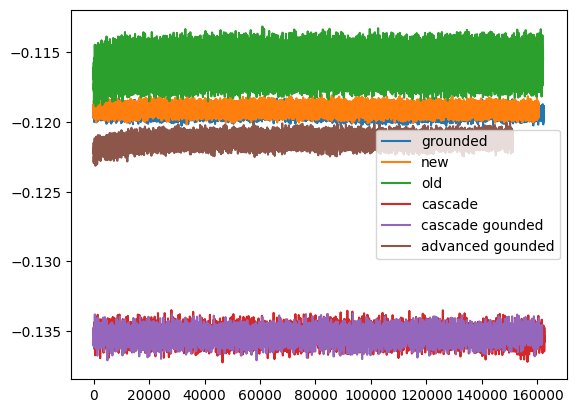

In [44]:

name = 'Spannungsteiler 1000-20 + femto 60dB'
arr = dgw.get_data(f'measurement/{name}/adwin')
V1_old, V2_old = arr['V1'], arr['V2']

name = 'Spannungsteiler 10000-2000 + 1000-200 + femto 60dB (grounded)'
arr = dgw.get_data(f'measurement/{name}/adwin')
V1_grounded, V2_grounded = arr['V1'], arr['V2']

name = 'Spannungsteiler 10000-2000 + 1000-200 + femto 60dB (2nd)'
arr = dgw.get_data(f'measurement/{name}/adwin')
V1, V2 = arr['V1'], arr['V2']


name = 'Spannungsteiler 10000-3000 + 21 + 21 + 21 + 21 + femto 60dB'
arr = dgw.get_data(f'measurement/{name}/adwin')
V1_cascade, V2_cascade = arr['V1'], arr['V2']

name = 'Spannungsteiler 10000-3000 + 21 + 21 + 21 + 21 + femto 60dB (grounded)'
arr = dgw.get_data(f'measurement/{name}/adwin')
V1_cascade_grounded, V2_cascade_grounded = arr['V1'], arr['V2']


name = 'Spannungsteiler 10000-220 + 1000-220 + femto 60dB (grounded)'
arr = dgw.get_data(f'measurement/{name}/adwin')
V1_advanced_grounded, V2_advanced_grounded = arr['V1'], arr['V2']

plt.plot(V1_grounded, label='grounded')
plt.plot(V1, label = 'new')
plt.plot(V1_old, label='old')
plt.plot(V1_cascade, label='cascade')
plt.plot(V1_cascade_grounded, label='cascade gounded')
plt.plot(V1_advanced_grounded, label='advanced gounded')

# plt.plot(V2_grounded, label='grounded')
# plt.plot(V2, label = 'new')
# plt.plot(V2_old, label='old')
# plt.plot(V2_cascade, label='cascade')
# plt.plot(V2_cascade_grounded, label='cascade gounded')
# plt.plot(V2_advanced_grounded, label='advanced gounded')
plt.legend()

# Test individual Noise Levels

Femto sind die BD

std(V1): 0.0001581754075036135, std(V2): 0.00015305952404130494, name: adwin base level <br>
std(V1): 0.0009244938965185042, std(V2): 0.00092547921754775660, name: adwin + VD(10k:100 + 1k:100) @RT <br>
std(V1): 0.0026193085613846180, std(V2): 0.00112241167262089480, name: adwin + Femto1(60dB) (Femto1 nur auf CH1, Kabel1) <br>
std(V1): 0.0011216708641204592, std(V2): 0.00283597856978419670, name: adwin + Femto1(60dB, CH2, Kabel1) <br>
std(V1): 0.0026214131784851550, std(V2): 0.00102623005767152870, name: adwin + Femto1(60dB, CH1, Kabel2) <br>
std(V1): 0.0026845681747268120, std(V2): 0.00111296354830931100, name: adwin + Femto1(60dB, CH1, Kabel4) <br>
std(V1): 0.0030079582438665700, std(V2): 0.00110890255361207520, name: adwin + Femto2(60dB, CH1, Kabel1) <br>
std(V1): 0.0004225076647011838, std(V2): 0.00110936634129580250, name: adwin + VD + Femto2(60dB, CH1, Kabel1) <br>
std(V1): 0.0039894055521394740, std(V2): 0.00103573272184896830, name: adwin + VD + Femto2(80dB, CH1, Kabel1) <br>
std(V1): 0.0004079713088328162, std(V2): 0.00111128149210581200, name: adwin + VD + Femto1(60dB, CH1, Kabel1) <br>
std(V1): 0.0005862701523272546, std(V2): 0.00111319521809152810, name: adwin + VD + Femto1(60dB, CH1, Kabel1) + touch between VD and Femto <br>
std(V1): 0.0003034313391588565, std(V2): 0.00111188742543688040, name: adwin + VD + Femto1(60dB, CH1, Kabel1) + touch between VD and Femto + verdrehtes Kabel1 (ohne touch) <br>
std(V1): 0.00016534827150210525, std(V2): 0.0011016399749617094, name: adwin + VD + Femto1(40dB, CH1, Kabel1) <br>
std(V1): 0.00016929502111993422, std(V2): 0.0011010756068999190, name: adwin + VD + Femto2(40dB, CH1, Kabel1) <br>
std(V1): 0.00017699682400732953, std(V2): 0.0011041872294617508, name: adwin + VD + Femto2(40dB, CH1, Kabel1) + gekreuztes Kabel1 <br>
std(V1): 0.00031158818895402036, std(V2): 0.0011034857072424937, name: adwin + Femto2(40dB, CH1, Kabel1) <br>
std(V1): 0.00164358920532561650, std(V2): 0.0011022939946594363, name: adwin + Femto1(40dB, CH1, Kabel1) (zustand aus) <br>
std(V1): 0.00030436471289291630, std(V2): 0.0011058053543278252, name: adwin + Femto1(40dB, CH1, Kabel1) 2 (femto auch wirklich an) <br>

std(V1): 0.0006492490744961214, std(V2): 0.0010313495565853890, name: adwin + SR560(Ref, 50Ohm, A-B) (10fach) <br>
std(V1): 0.0382182180519594200, std(V2): 0.0009139397673878801, name: adwin + SR560(Ref, 50Ohm, A-B, x1000) <br>
std(V1): 0.0038301076590307828, std(V2): 0.0010149358338940230, name: adwin + SR560(Ref, 50Ohm, A-B, x100) <br>
std(V1): 0.0006462442171930883, std(V2): 0.0010062122015018138, name: adwin + VD + SR560(Ref, 50Ohm, A-B, x100) <br>
std(V1): 0.0038818077280803015, std(V2): 0.0009108465433548140, name: adwin + VD + SR560(Ref, 50Ohm, A-B, x1000) <br>
std(V1): 0.0008413663827746182, std(V2): 0.0009121478189220968, name: adwin + VD + SR560(Ref, 50Ohm, A-B, x1000, LowPass 12db 30Hz) <br>
std(V1): 0.0008396360510607790, std(V2): 0.0009116152854603725, name: adwin + VD + SR560(Ref, 50Ohm, A-B, x1000, LowPass 12db 30Hz) + gekreuztes AB <br>
std(V1): 0.0005049034625730307, std(V2): 0.0010231128831412137, name: adwin + VD + SR560(Sample, 50Ohm, A-B, x100) <br>
std(V1): 0.0041479553516469470, std(V2): 0.0009202718673897252, name: adwin + VD + SR560(Sample, 50Ohm, A-B, x1000) <br>
std(V1): 0.0394754055873112260, std(V2): 0.0009201355767424339, name: adwin + SR560(Sample, 50Ohm, A-B, x1000) <br>
std(V1): 0.0039864312275228860, std(V2): 0.0010218629866170750, name: adwin + SR560(Sample, 50Ohm, A-B, x100) <br>

std(V1): 0.0038815276232501594, std(V2): 0.0010722964945822190, name: adwin + NF(gruen, A-B) <br>
std(V1): 0.0038424282982256943, std(V2): 0.0010754046148782823, name: adwin + NF(rot, A-B) <br>
std(V1): 0.0003405438157214731, std(V2): 0.0010750611199902675, name: adwin + VD + NF(rot, A-B) <br>
std(V1): 0.0004053050650119999, std(V2): 0.0010758065076982120, name: adwin + VD + NF(gruen, A-B) <br>



### Learnings

Femto and other amplifiers have comparable noise levels, but femto shows artefacts and 50 Hz if combined with VD  <br>
Almost only 50 Hz, 150 Hz etc.  <br>
Tough of VD and Femto makes a difference, crossed/twisted cables as well  <br>

Where do artefacts and 50 Hz come from?  <br>

**Test NF and SR in series**  <br> 

Talk to Elke  <br>

VD macht Ground Loop
Ground loop in Femto Netzteil -> deswegen 2 netzteile
Femto gibt masse von Kryo auf netzteil -> netzteil nicht extra grounden

In [1]:
Same Source better than 2 sources.

SyntaxError: invalid syntax (1033163745.py, line 1)

std(V1): 0.0002824543909299350, std(V2): 0.0011689018914562731, name: adwin + VD + Femto1(20dB)
std(V1): 0.0004314127146335649, std(V2): 0.0011670655305649324, name: adwin + VD + Femto1(40dB)
std(V1): 0.0035695723221415075, std(V2): 0.0011602684082616334, name: adwin + VD + Femto1(60dB)
std(V1): 0.0324696376374001300, std(V2): 0.0010746471748942150, name: adwin + VD + Femto1(80dB)

std(V1): 0.11557276679640512, std(V2): 0.0010793505109214388, name: adwin + VD + Femto1(80dB, 100kHz)
std(V1): 0.031028719377055765, std(V2): 0.0011822660321224904, name: adwin + VD + Femto1(80dB, 1kHz, twistet Kabel1)

std(V1): 0.00020826673658022853, std(V2): 0.00019138734283237602, name: adwin + VD + Femto1(Kabel1) + Femto2(Kabel2) [DC, 1kHz, 20dB]
std(V1): 0.0001633801512203171, std(V2): 0.00014805521759089833, name: adwin + VD + Femto1(Kabel1) + Femto2(Kabel2) [DC, 1kHz, 20dB, same source]
std(V1): 0.00012824452622140476, std(V2): 0.00013901000241344977, name: adwin + VD + Femto1(Kabel1) + Femto2(Kabel2) [DC, 1kHz, 20dB, same source, extra grounded]
std(V1): 0.000116446362577828, std(V2): 0.0001067296849913338, name: adwin + VD + Femto1(Kabel1) + Femto2(Kabel2) [DC, 1kHz, 20dB, same old source, chasis grounded]
std(V1): 0.003586359045857179, std(V2): 0.0035454671861108226, name: adwin + VD + Femto1(Kabel1) + Femto2(Kabel2) [DC, 1kHz, 60dB, same old source, chasis grounded]

std(V1): 0.00023623162579423004, std(V2): 0.0002443081191235619, name: adwin + VD + SR560(sample) + SR560(ref) (x10, DC, A-B, batterie)
std(V1): 0.0013853273385312029, std(V2): 0.0013954111510081815, name: adwin + VD + SR560(sample) + SR560(ref) (x100, DC, A-B, batterie)
std(V1): 0.2494066726067532, std(V2): 0.18742953873731386, name: adwin + VD + SR560(sample) + SR560(ref) (x1000, DC, A-B, batterie)

std(V1): 0.00018175538267651615, std(V2): 0.0001938232812623665, name: adwin + VD + SR560(sample) + SR560(ref) (x10, DC, A-B, batterie, LP12, 3KHz)
std(V1): 0.0004082463396750427, std(V2): 0.0003898424529686702, name: adwin + VD + SR560(sample) + SR560(ref) (x100, DC, A-B, batterie, LP12, 3KHz)
std(V1): 0.003666461702823184, std(V2): 0.003600448087990273, name: adwin + VD + SR560(sample) + SR560(ref) (x1000, DC, A-B, batterie, LP12, 3KHz)

std(V1): 0.0001793158324219841, std(V2): 0.0001786509494561376, name: adwin + VD + SR560(sample) + SR560(ref) (x10, DC, A-B, batterie, LP12, 100Hz)
std(V1): 0.00030281394752148014, std(V2): 0.00027306663695417493, name: adwin + VD + SR560(sample) + SR560(ref) (x100, DC, A-B, batterie, LP12, 100Hz)
std(V1): 0.0012549222790908217, std(V2): 0.0011298017244685454, name: adwin + VD + SR560(sample) + SR560(ref) (x1000, DC, A-B, batterie, LP12, 100Hz) 2

Verschiedene LP frequenzen schneiden unterschiedlich stark das Rauschen ab -> Kann man das nicht digital auch wieder rausfiltern??

std(V1): 0.00018727879150399332, std(V2): 0.00018802646659070796, name: adwin + VD + SR560(sample) + SR560(ref) (x10, DC, A-B, batterie, grounded, LP12, 1kHz)
std(V1): 0.00031740604123138224, std(V2): 0.00028134965500141174, name: adwin + VD + SR560(sample) + SR560(ref) (x100, DC, A-B, batterie, grounded, LP12, 1kHz)
std(V1): 0.003139588125446519, std(V2): 0.0030837579892730995, name: adwin + VD + SR560(sample) + SR560(ref) (x1000, DC, A-B, batterie, grounded, LP12, 1kHz)

# power amp gegrounded nicht chasis
std(V1): 0.00035838979827858974, std(V2): 0.00037396218608263035, name: adwin + VD + SR560(sample) + SR560(ref) (x100, DC, A-B, batterie, grounded, LP12, 1kHz, chasis grounded) # nicht angeschlöossen lol
std(V1): 0.003384913448075519, std(V2): 0.0027051679679098175, name: adwin + VD + SR560(sample) + SR560(ref) (x100, DC, A-B, batterie, grounded, LP12, 1kHz, chasis grounded) 2 # bei x1000 lol
std(V1): 0.0003391348729367883, std(V2): 0.0003365700494069759, name: adwin + VD + SR560(sample) + SR560(ref) (x100, DC, A-B, batterie, grounded, LP12, 1kHz, chasis grounded) 3

# real chsis is grounded
std(V1): 0.0003039920976346824, std(V2): 0.0002885119499884851, name: adwin + VD + SR560(sample) + SR560(ref) (x100, DC, A-B, batterie, grounded, LP12, 1kHz, real chasis grounded) 3

In [111]:
gw.adwin.setAmplitude(0)
gw.adwin.setLockinAmplitude(0) #10 mV
gw.adwin.setAveraging(3)
name = 'adwin + VD + SR560(sample) + SR560(ref) (x100, DC, A-B, batterie, grounded, LP12, 1kHz, real chasis grounded) 3'

m = gw.measure(f'{name}')
m.start()
sleep(5)
m.stop()
arr = dgw.get_data(f'measurement/{name}/adwin')
V1 = arr['V1']
V2 = arr['V2']
print(f"std(V1): {np.std(V1)}, std(V2): {np.std(V2)}, name: {name}")

std(V1): 0.0003039920976346824, std(V2): 0.0002885119499884851, name: adwin + VD + SR560(sample) + SR560(ref) (x100, DC, A-B, batterie, grounded, LP12, 1kHz, real chasis grounded) 3


std(V1): 3.8451032916560294e-05, std(V2): 4.053535106467976e-05, name: adwin + VD + SR560(sample) + SR560(ref) (x10, DC, A-B, batterie, LP12, 1Hz)
std(V1): 0.00045436753048747763, std(V2): 0.0004813086973829332, name: adwin + VD + SR560(sample) + SR560(ref) (x100, DC, A-B, batterie, LP12, 1Hz)
std(V1): 0.005415875329821744, std(V2): 0.005101086299720107, name: adwin + VD + SR560(sample) + SR560(ref) (x1000, DC, A-B, batterie, LP12, 1Hz)

-> Cutoff funktioniert 

In [104]:
gw.adwin.setAmplitude(0)
gw.adwin.setLockinAmplitude(0) #10 mV
gw.adwin.setAveraging(100)
name = 'adwin + VD + SR560(sample) + SR560(ref) (x1000, DC, A-B, batterie, LP12, 1Hz)'

m = gw.measure(f'{name}')
m.start()
sleep(100)
m.stop()
arr = dgw.get_data(f'measurement/{name}/adwin')
V1 = arr['V1']
V2 = arr['V2']
print(f"std(V1): {np.std(V1)}, std(V2): {np.std(V2)}, name: {name}")

std(V1): 0.005415875329821744, std(V2): 0.005101086299720107, name: adwin + VD + SR560(sample) + SR560(ref) (x1000, DC, A-B, batterie, LP12, 1Hz)


In [ ]:

gw.adwin.setAveraging(5)

In [37]:
'''
Function to measure frequency sweeps.

'''
def measure_frequency_sweep(name, gw, dgw, points):

    # ADwin settings
    gw.addawin.setAmplitude(0)
    gw.addawin.setLockinAmplitude(.01) #10 mV
    gw.addawin.setAveraging(3) #50 kHz sampling rate
    gw.addawin.setRange(1.25,ch=1) # internal amplification = 10/range; range = 1.25, 2.5, 5, 10

    frequencies = np.logspace(0,4,points)

    for freq in tqdm(frequencies):
        gw.addawin.setLockinFrequency(freq)

        m = gw.measure(f'{name}/f_{freq}_Hz')
        m.start()

        sleep_time = max(1,10/freq)
        sleep(sleep_time)

        m.stop()

        arr = dgw.get_data(f'measurement/{name}/f_{freq}_Hz/addawin/raw_data', 'V1')

        V_ptp = np.abs(np.max(arr)-np.min(arr))
        V_rms = np.sqrt(np.mean(np.abs(arr)**2))

        my_dict = {
            'freq': float(freq),
            'V_ptp': V_ptp,
            'V_rms': V_rms
        }

        dgw.append(f'freq_sweep/{name}', my_dict)


In [38]:
def plot_frequency_sweep(name, dgw):

    freq = dgw.get_data(f'freq_sweep/{name}', 'freq')
    V_ptp = dgw.get_data(f'freq_sweep/{name}', 'V_ptp')
    V_rms = dgw.get_data(f'freq_sweep/{name}', 'V_rms')

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    color = 'tab:blue'
    ax1.loglog(freq, V_ptp, '*', color=color)
    ax1.set_xlabel('frequency [Hz]')
    ax1.set_ylabel('V_ptp [V]', color=color)  
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(which='both')
    
    color = 'tab:red'
    ax2.loglog(freq, V_rms, 'o', color=color)
    ax2.set_ylabel('V_rms [V]', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)